In [1]:
import google.generativeai as genai
#import env
import os
from dotenv import load_dotenv
load_dotenv()

GCP_KEY = os.getenv("GCP_KEY")


genai.configure(api_key=GCP_KEY)
model = genai.GenerativeModel("gemini-1.5-flash")

# Attempt to fine-tune the model using resume pdf
try:
	model.finetune("resume.pdf")
except AttributeError as e:
	print(f"Error: {e}. The 'GenerativeModel' object has no attribute 'finetune'.")
	# Add alternative code or method for fine-tuning if available

Error: 'GenerativeModel' object has no attribute 'finetune'. The 'GenerativeModel' object has no attribute 'finetune'.


c:\Users\chavv\anaconda\envs\gemini\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
for i, m in zip(range(5), genai.list_tuned_models()):
  print(m.name)

tunedModels/generate-num-8637


In [3]:
base_model = [
    m for m in genai.list_models()
    if "createTunedModel" in m.supported_generation_methods and
    "flash" in m.name][0]
base_model

Model(name='models/gemini-1.5-flash-001-tuning',
      base_model_id='',
      version='001',
      display_name='Gemini 1.5 Flash 001 Tuning',
      description=('Version of Gemini 1.5 Flash that supports tuning, our fast and versatile '
                   'multimodal model for scaling across diverse tasks, released in May of 2024.'),
      input_token_limit=16384,
      output_token_limit=8192,
      supported_generation_methods=['generateContent', 'countTokens', 'createTunedModel'],
      temperature=1.0,
      max_temperature=2.0,
      top_p=0.95,
      top_k=64)

In [4]:
import random

name = f'generate-num-{random.randint(0,10000)}'
operation = genai.create_tuned_model(
    source_model=base_model.name,
    training_data=[
        {
            "text_input": "Summarize the following resume: Ravi Kumar Chavva, B. Tech in Computer Science and Engineering, CGPA 8.4/10. Skills: Python, TypeScript, TensorFlow, FastAPI. Projects: Customer Churn Prediction (86% recall with FastAPI deployment), Car Price Prediction (85% adjusted R²), IPL Score Prediction (92% accuracy).",
            "output": "Ravi Kumar Chavva, B. Tech in CSE (8.4 CGPA). Proficient in Python, TypeScript, TensorFlow, and FastAPI. Key projects: churn prediction (86% recall), car price prediction (85% R²), and IPL score prediction (92% accuracy)."
        },
        {
            "text_input": "Rephrase: Ravi led the Data Nexus association at his college, organizing workshops and peer sessions to accelerate data science learning among students.",
            "output": "As the founder of Data Nexus, Ravi enhanced data science education by hosting workshops and collaborative learning sessions."
        },
        {
            "text_input": "What is Ravi Kumar Chavva's educational background?",
            "output": "Ravi Kumar Chavva is pursuing a B. Tech in Computer Science and Engineering (CGPA: 8.4/10) at Sri Venkateswara College of Engineering."
        },
        {
            "text_input": "List Ravi's technical skills.",
            "output": "Programming: Python, C, TypeScript. ML/Deep Learning: Scikit-learn, TensorFlow, PyTorch. Data Analysis: SQL, Polars, PySpark. Cloud: Azure, GCP. DevOps: FastAPI, Docker, GitHub Actions."
        },
        {
            "text_input": "Highlight Ravi's achievements.",
            "output": "Founded Data Nexus, a data science association fostering peer-to-peer learning. Achieved recall of 86% in churn prediction and accuracy of 92% in IPL score prediction models."
        },
        {
            "text_input": "Describe Ravi's project on Customer Churn Prediction.",
            "output": "Performed EDA on over 8,000+ customer records, identifying key churn factors and driving actionable insights. Built a classification model to predict customer churn, starting with linear models like Logistic Regression and achieving 56% recall. Addressed class imbalance using SMOTE, improving the model's generalization ability on imbalanced datasets. Employed Boosting algorithms such as CatBoost and Bayesian Search to fine-tune non-linear models, achieving a 30% recall improvement over the baseline logistic model, leading to 86% recall. Built the model as a serverless container using FastAPI for the backend to interact with the portfolio, enabling real-time churn predictions with a response time of under 3 seconds."
        },
        {
            "text_input": "Describe Ravi's project on Car Price Prediction.",
            "output": "Trained a baseline model using Linear Regression, achieving an initial adjusted R² score of 39%. Enhanced model accuracy by implementing regularization techniques and conducting error analysis. Improved the adjusted R² score to 85% by incorporating ensemble methods like Bagging and Boosting."
        },
        {
            "text_input": "Describe Ravi's project on IPL Score Prediction.",
            "output": "Developed a machine learning model with 92% accuracy, improving sports analytics by 20% over baseline models. Preprocessed over 100,000 match data points using Python and Scikit-learn, and optimized model performance with PyCaret. Implemented a Flask web app for user input and predictions, driving consistent engagement. Deployed the solution on Google Kubernetes Engine (GKE), ensuring performance, scalability, and cost efficiency."
        },
        {
            "text_input": "What are Ravi's programming skills?",
            "output": "Python, C, TypeScript"
        },
        {
            "text_input": "What are Ravi's machine learning and deep learning skills?",
            "output": "Scikit-learn, TensorFlow, PyTorch, PyCaret, Computer Vision"
        },
        {
            "text_input": "What are Ravi's data analysis and visualization skills?",
            "output": "SQL, Polars, Statistical Analysis, PySpark"
        },
        {
            "text_input": "What are Ravi's MLOps and cloud computing skills?",
            "output": "Weights & Biases, Azure (ADF, Databricks, Storage), GCP (Cloud Run)"
        },
        {
            "text_input": "What are Ravi's DevOps and deployment skills?",
            "output": "FastAPI, Docker, GitHub Actions, Google Cloud Run"
        },
        {
            "text_input": "What are Ravi's other technical skills?",
            "output": "Data Structures and Algorithms, Next.js, Hadoop"
        },
        {
            "text_input": "What is Ravi's educational background?",
            "output": "Bachelor of Technology (B. Tech) in Computer Science and Engineering from Sri Venkateswara College of Engineering, Tirupati, India (2021 – Present) with a CGPA of 8.4/10. Completed education at Sri Chaitanya Junior College, Andhra Pradesh, India (2019 – 2021) with 94.7%. Completed education at Target English Medium School, Andhra Pradesh, India (2010 – 2019) with 10 GPA."
        },
        {
            "text_input": "What certifications does Ravi hold?",
            "output": "Machine Learning for Engineering and Science Applications – NPTEL"
        },
        {
            "text_input": "Describe Ravi's experience at ExcelR.",
            "output": "Gained hands-on experience with the Data Science Process, from data collection and cleaning to model deployment. Developed and deployed multiple machine learning models, optimizing workflows and reducing data processing time by 15%."
        },
        {
            "text_input": "What are Ravi's achievements?",
            "output": "Initiated Data Nexus: Founded and led a data science Association, 'Data Nexus,' at college to help fellow students accelerate their learning in data science through peer-to-peer sessions, workshops, and resources."
        }
    ],
    id=name,
    epoch_count=100,
    batch_size=4,
    learning_rate=0.001,
)

In [5]:
model = genai.get_tuned_model(f'tunedModels/{name}')

model

TunedModel(name='tunedModels/generate-num-6310',
           source_model='models/gemini-1.5-flash-001-tuning',
           base_model='models/gemini-1.5-flash-001-tuning',
           display_name='',
           description='',
           temperature=1.0,
           top_p=0.95,
           top_k=64,
           state=<State.CREATING: 1>,
           create_time=datetime.datetime(2024, 11, 20, 10, 0, 1, 291730, tzinfo=datetime.timezone.utc),
           update_time=datetime.datetime(2024, 11, 20, 10, 0, 1, 291730, tzinfo=datetime.timezone.utc),
           tuning_task=TuningTask(start_time=None,
                                  complete_time=None,
                                  snapshots=[],
                                  hyperparameters=Hyperparameters(epoch_count=100,
                                                                  batch_size=4,
                                                                  learning_rate=0.001)),
           reader_project_numbers=None)

In [6]:
model.state

<State.CREATING: 1>

In [7]:
operation.metadata

total_steps: 450
tuned_model: "tunedModels/generate-num-6310"

In [8]:
import time

for status in operation.wait_bar():
  time.sleep(30)

100%|██████████| 450/450 [28:09<00:00,  3.75s/it]


<Axes: xlabel='epoch', ylabel='mean_loss'>

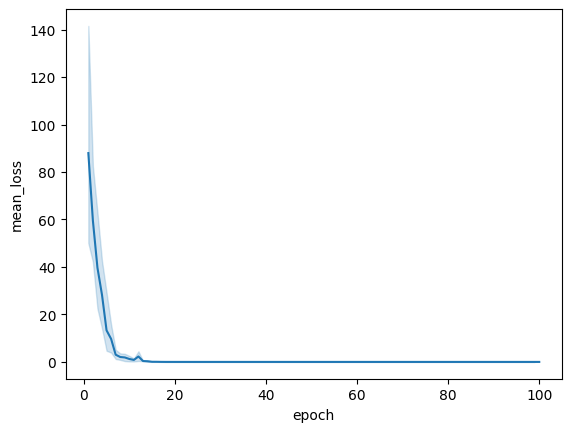

In [12]:
import pandas as pd
import seaborn as sns

model = operation.result()

snapshots = pd.DataFrame(model.tuning_task.snapshots)

sns.lineplot(data=snapshots, x = 'epoch', y='mean_loss')

In [ ]:
model = genai.GenerativeModel(model_name=f'tunedModels/{name}')
result = model.generate_content('Summarize the Ravi Kumar Chavva skills and projects.')
result.text

'Ravi Kumar Chavva is proficient in Python, SQL, Polars, PySpark, and the Hadoop ecosystem. Key projects include a portfolio tracker with a web interface using FastAPI for the backend, a SQL database to store data, and Polars for data analysis.'

In [16]:
result = model.generate_content("Tell me about Ravikumar Chavva's Education.")
result.text

'Ravi Kumar Chavva is pursuing a B. Tech in Computer Science and Engineering (CGPA: 8.4/10) at Sri Venkateswara College of Engineering.'